# Assigment 2: Deep Learning

## Generate Dataset

This is the same code from Assignment 1

In [476]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Generate the data
X, y = datasets.make_regression(n_samples=10000, n_features=5, noise=5, random_state=4)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)


## Visualize Dataset
This is the same code from Assignment 1

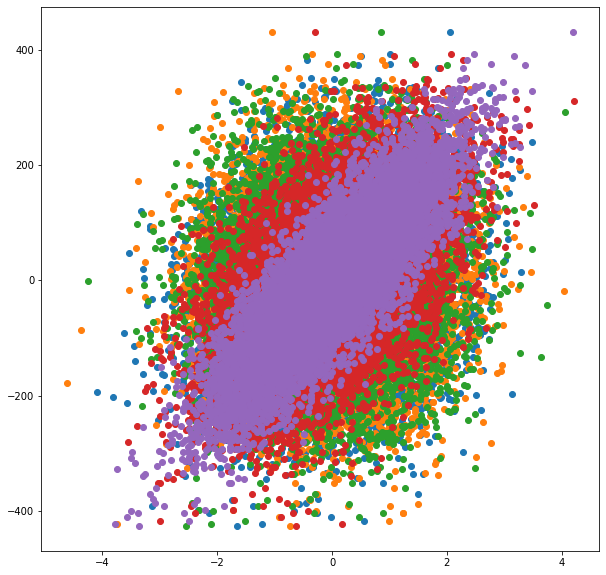

In [477]:
import matplotlib.pyplot as plt

# Your code here
plt.rcParams["figure.figsize"] = (10,10)
plt.scatter(X[:,0],y)
plt.scatter(X[:,1],y)
plt.scatter(X[:,2],y)
plt.scatter(X[:,3],y)
plt.scatter(X[:,4],y)

## Model Definition

Using TensorFlow, build a model with the following definition:
> Input of shape 5 \\
> Dense of shape 5 \\
> Dense of shape 5 \\
> Dense of shape 1 \\

Use Mean Square Error Loss and Stochaistic Gradient Descent (SGD) Optimizer

Use Gradient Decay with appropriate parameters

In [478]:
import tensorflow as tf

# Your code here

In [479]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(5,)),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [480]:
opt = tf.keras.optimizers.SGD(learning_rate=0.001,decay=0.1)
# opt = tf.keras.optimizers.RMSprop()
model.compile(opt,loss='mse',metrics='mse')

In [481]:
# Splitting data into train and validation data
X_train_data, X_train_validation, y_train_data, y_train_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=69)

In [482]:
versions = model.fit(X_train_data,y_train_data,validation_data=(X_train_validation,y_train_validation),epochs=100)

Epoch 1/100
200/200 [==============================] - 1s 2ms/step - loss: 2440.5205 - mse: 2440.5205 - val_loss: 125.9075 - val_mse: 125.9075
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 83.1356 - mse: 83.1356 - val_loss: 62.6759 - val_mse: 62.6759
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 49.0916 - mse: 49.0916 - val_loss: 45.3941 - val_mse: 45.3941
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 38.3779 - mse: 38.3779 - val_loss: 38.2120 - val_mse: 38.2120
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 33.8262 - mse: 33.8262 - val_loss: 34.7110 - val_mse: 34.7110
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 31.4967 - mse: 31.4967 - val_loss: 32.8231 - val_mse: 32.8231
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 30.1997 - mse: 30.1997 - val_loss: 31.6434 - val_mse: 31.6434
Epoch 8/100
200/200 [==============

In [483]:
test_loss, test_mse = model.evaluate(X_test,y_test, verbose=3)

print('\nMSE:', test_mse)


MSE: 26.513765335083008


## Plot Loss

Using matplotlib visualise how the loss (both validation and training) is changing, use this information to retrain the model with appropriate parameters.<br>We ideally want the loss to be constant over the last few iterations.

<AxesSubplot:>

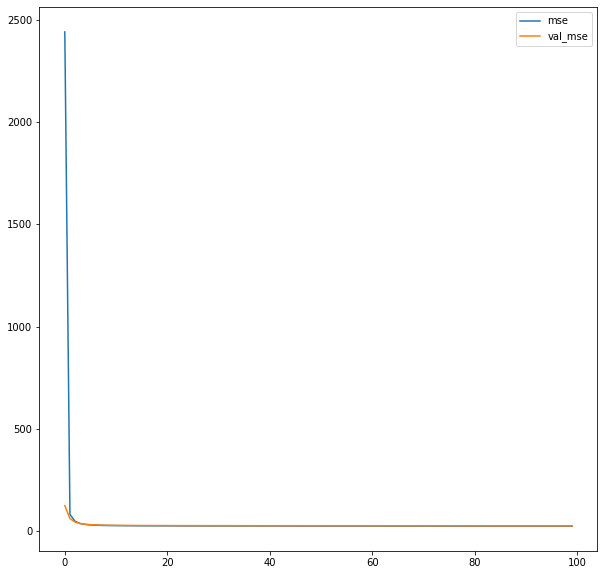

In [484]:
import pandas as pd
# Your code here
versions_df = pd.DataFrame(versions.history)
versions_df.describe()
versions_df.loc[:,['mse', 'val_mse']].plot()


## Evaluation Metrics
Use the R2 Score function implemented in the first assignment to evaluate the performance of the model.

In [485]:
# Insert the function for R2 Score
import numpy as np
def r2_score(y_true, y_pred):
      # return the r2 score
      sum_square_regression = np.sum(np.dot(y_true-y_pred,y_true-y_pred))
      total_sum_squares = np.sum(np.dot(y_true-np.mean(y_true),y_true-np.mean(y_true)))
      return 1 - sum_square_regression/total_sum_squares
      # pass  # Uncomment this when you're done with this function

0.9980982811892871


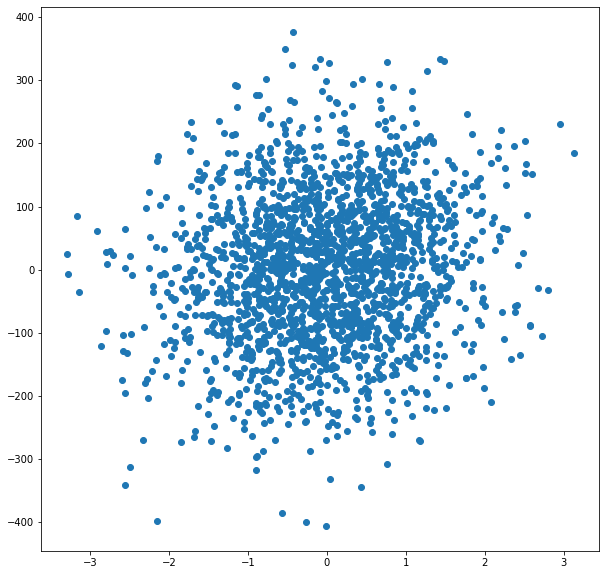

In [486]:
y_pred = model.predict(X_test,verbose=3)
y_pred = np.squeeze(y_pred)
print(r2_score(y_test,y_pred))
plt.rcParams["figure.figsize"] = (10,10)
plt.scatter(X_test[:,0],y_pred)

## Your own custom model
Build a custom model of your own choice.<br>
Describe it in detail in Markdown/Latex in the cell below.<br>
Visualise the loss, as before.

Your text here

In [487]:
# Your code here
model1 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(5,)),
    tf.keras.layers.Dense(3, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [488]:
model1.compile(optimizer='adam',loss='mse',metrics='mse')

In [489]:
versions1 = model1.fit(X_train_data,y_train_data,validation_data=(X_train_validation,y_train_validation),epochs=100)

Epoch 1/100
200/200 [==============================] - 1s 2ms/step - loss: 13840.1172 - mse: 13840.1172 - val_loss: 13524.0000 - val_mse: 13524.0000
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 13687.1973 - mse: 13687.1973 - val_loss: 13352.5820 - val_mse: 13352.5820
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 13474.3613 - mse: 13474.3613 - val_loss: 13104.5859 - val_mse: 13104.5859
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 13185.0664 - mse: 13185.0664 - val_loss: 12785.2529 - val_mse: 12785.2529
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 12830.8779 - mse: 12830.8779 - val_loss: 12404.9346 - val_mse: 12404.9346
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 12421.9922 - mse: 12421.9922 - val_loss: 11975.1084 - val_mse: 11975.1084
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 11962.5391 - mse: 11962.5391 - 

In [490]:
test_loss1, test_mse1 = model1.evaluate(X_test,y_test, verbose=3)

print('\nMSE:', test_mse1)


MSE: 135.0410919189453


<AxesSubplot:>

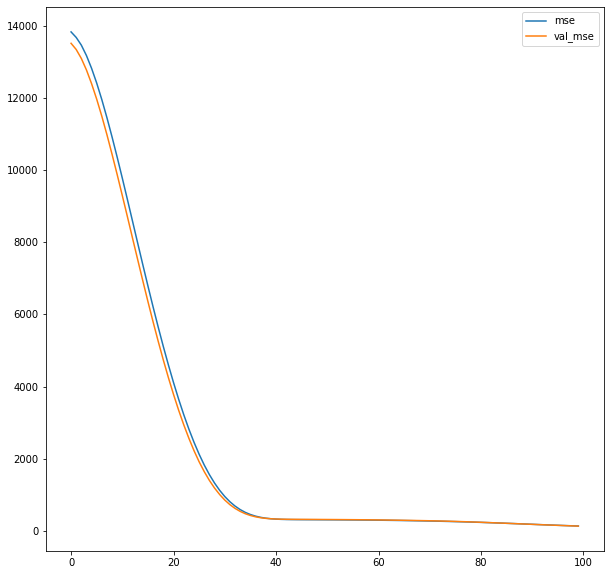

In [491]:
import pandas as pd
# Your code here
versions_df1 = pd.DataFrame(versions1.history)
versions_df1.describe()
versions_df1.loc[:,['mse', 'val_mse']].plot()


In [492]:
# Insert the function for R2 Score
import numpy as np
def r2_score(y_true, y_pred):
      # return the r2 score
      sum_square_regression = np.sum(np.dot(y_true-y_pred,y_true-y_pred))
      total_sum_squares = np.sum(np.dot(y_true-np.mean(y_true),y_true-np.mean(y_true)))
      return 1 - sum_square_regression/total_sum_squares
      # pass  # Uncomment this when you're done with this function

In [493]:
y_pred1 = model1.predict(X_test,verbose=3)
y_pred1 = np.squeeze(y_pred1)
r2_score(y_test,y_pred1)

0.9903140806417874